# Helen Hammond's Module 4 Project

### Date: Feb 21 2023

# Task 3 - Time Series and Simple Linear Regression

Follow the process provided in the text. 
1.	Follow the instructions from 10.16 (starting page 414).
2.	Note: The data is for the average (daily) high temperature in January over many years.
3.	For example, in 1895, the average high temperature in January was 34.2.
4.	We only care about this one series of data: the "average high temp in Jan".
5.	There's a lot of stats in the title, and it has confused students. Just think of each value as "the temperature" for that year.
6.	We'll use all of the data available to build a best-fit line (supervised learning). 
7.	We'll use the slope and intercept of the best-fit line to estimate a point out in the future.
8.	Use a notebook (rather than interactive mode). 
9.	Use pandas DataFrames to plot Celsius vs Fahrenheit 
10.	Refresh your understanding of the equation for a line (y=mx +b)
11.	Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.
12.	Follow the instructions to view head and tail of the file. 
13.	Follow the instructions to clean the data.
14.	Use describe() to calculate basic descriptive statistics for the dataset. 
15.	Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.
16.	Use your results to predict the "average high temp in Jan" for the year 2026. 
17.	Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.
18.	In the same notebook, continue with 15.4 (staring page 620). 
19.	This time, we'll use scikit-learn estimator, and we'll practice splitting data for training (to build a model) and testing (testing our model against known values). 
20.	Follow the instructions all the way though charting it again with the specified axes.
21.	At the end of your notebook add some remarks comparing the two methods. 
22.	By now, you know to include the title, your name, and section headings (always!) and to tell an engaging story with data, so we won't remind you.
Excellent analytical skills need professional communication skills to be of maximum benefit. 


## 1 - Load

Import pandas library

In [865]:
import pandas as pd

Load the New York City data into a DataFrame

In [866]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895_2018.csv')

View top 5 entries in the data

In [867]:
nyc_df.head()

,New York,New York,Average Temperature
0,189501,28.4,-2.8
1,189601,28.0,-3.2
2,189701,28.8,-2.4
3,189801,33.4,2.2
4,189901,29.3,-1.9


View last 7 entries

In [868]:
nyc_df.tail(7)

,New York,New York,Average Temperature
122,201701,38.1,6.9
123,201801,31.8,0.6
124,201901,32.6,1.4
125,202001,39.2,8.0
126,202101,34.8,3.6
127,202201,30.4,-0.8
128,202301,43.5,12.3


## 2 - Data Cleaning

Let's rename the columns to Date, Temperature and Anomaly

In [869]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,28.4,-2.8
1,189601,28.0,-3.2
2,189701,28.8,-2.4


Since we know that it is January data, we can remove the month from the date information to display the year only.

In [870]:
nyc_df.Date.dtype

dtype('int64')

Being an int column, we can achieve this by dividing by 100 using the Series method _floordiv_

In [871]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,28.4,-2.8
1,1896,28.0,-3.2
2,1897,28.8,-2.4
3,1898,33.4,2.2
4,1899,29.3,-1.9


## 3 - Descriptive Statistics

Let's calculcate basic descriptive statistics for this dataset

Set the precision to 2

In [872]:
pd.options.display.precision = 2


We have 129 entries. The mean temperature is 31.58. The highest temperature is 43.50 and the lowest was 20.50.

In [873]:
nyc_df.describe()

,Date,Temperature,Anomaly
count,129.00,129.00,129.00
mean,1959.00,31.58,0.38
std,37.38,4.58,4.58
min,1895.00,20.50,-10.70
25%,1927.00,28.70,-2.50
50%,1959.00,31.30,0.10
75%,1991.00,34.50,3.30
max,2023.00,43.50,12.30


## 4 - SciPy Stats

Import stats module from the SciPy (Scientific Python) library

In [874]:
from scipy import stats

Using the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data

In [875]:
linear_regress_result = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)
linear_regress_result

LinregressResult(slope=0.030204606440071554, intercept=-27.587103085867618, rvalue=0.24637931210403088, pvalue=0.004883527210574785, stderr=0.010543106763739778, intercept_stderr=20.65767725131799)

In [876]:
linear_regress_result.slope

0.030204606440071554

In [877]:
linear_regress_result.intercept

-27.587103085867618

Predict the average high temp in Jan 2026

In [878]:
linear_regress_result.slope * 2026 + linear_regress_result.intercept


33.60742956171735

Let's approximate what the average temperature might have been in the year 1890

In [879]:
linear_regress_result.slope * 1890 + linear_regress_result.intercept

29.49960308586762

## 5 - Seaborn

Let’s use Seaborn’s regplot function to plot each data point with the dates on the x-axis and the temperatures on the y-axis. The regplot function creates the scatter plot or scattergram below in which the scattered blue dots represent the Temperatures for the given Dates, and the straight line displayed through the points is the regression line.

Import Seaborn and enable grid lines

In [880]:
import seaborn as sns
sns.set_style('whitegrid')

Use Seaborn's regplot function to create a scattergram showing the best fit line.

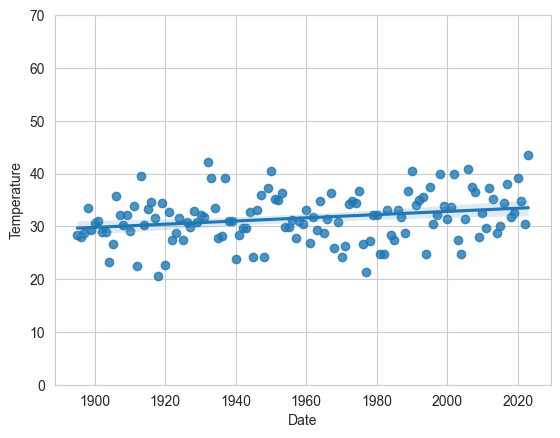

[(0.0, 70.0)]

In [881]:
axes = sns.regplot(x=nyc_df.Date, 
                   y=nyc_df.Temperature)
axes.set(ylim=(0, 70)) # y sxis scaling

The y axis is scaled to start from 0 to 70 for a vivid view of the linear relationship

## 5 - scikit-learn estimator
In this section, we’ll

- use a scikit-learn estimator to reimplement the simple linear regression we showed in Chapter 10,
- use Seaborn’s scatterplot function to plot the data and Matplotlib’s plot function to display the regression line, then
- use the coefficient and intercept values calculated by the scikit-learn estimator to make predictions.


Display the top 5 entries in the average temperature data

In [882]:
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,28.4,-2.8
1,1896,28.0,-3.2
2,1897,28.8,-2.4
3,1898,33.4,2.2
4,1899,29.3,-1.9


### Splitting the Data for Training and Testing
Let’s split the data into training and testing sets while using the keyword argument _random_state_ for reproducibility.

In [883]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)

We can confirm the 75%–25% train-test split by checking the shapes of X_train and X_test:

In [884]:
X_train.shape

(96, 1)

In [885]:
X_test.shape

(33, 1)

### Training the Model

Let’s train a LinearRegression estimator:

In [886]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

After training the estimator, fit returns the estimator, and IPython displays its string representation

In [887]:
linear_regression.coef_

array([0.02654159])

In [888]:
linear_regression.intercept_

-20.64745884965625

### Testing the Model
Let’s test the model using the data in X_test and check some of the predictions throughout the dataset by displaying the predicted and expected values for every fifth element

In [889]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 29.65, expected: 28.40
predicted: 31.37, expected: 33.10
predicted: 31.69, expected: 34.30
predicted: 32.57, expected: 31.30
predicted: 32.65, expected: 36.50
predicted: 32.41, expected: 33.90
predicted: 30.23, expected: 31.60


### Predicting Future Temperatures and Estimating Past Temperatures

Let’s use the coefficient and intercept values to predict the January 2026 average high temperature and to estimate what the average high temperature was in January of 1890. The lambda in the following snippet implements the equation for a line

y = mx + b

using the coef_ as m and the intercept_ as b.

In [890]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2026)

array([33.12581252])

In [891]:
predict(1890)


array([29.51615561])

### Visualizing the Dataset with the Regression Line
Next, let’s create a scatter plot of the dataset. With it, display the regression line. First, create an array containing the minimum and maximum date values in nyc.Date. Show the plot:

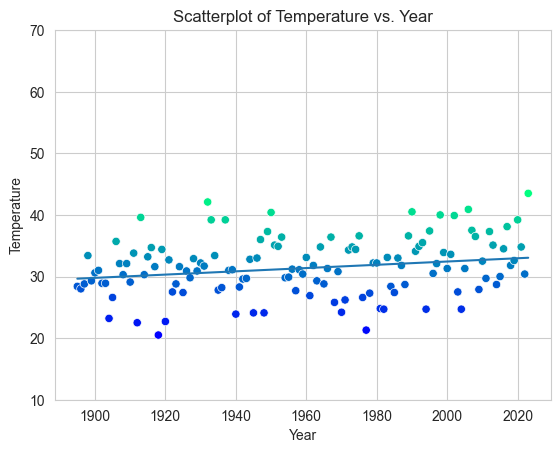

In [892]:
sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False).set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Scatterplot of Temperature vs. Year")
plt.plot(x, y)

plt.show()

## Conclusion

To fit a linear function to a set of data points, linear regression models are available in both SciPy and SciKit-Learn. However, the two libraries have a few different features and slightly different interfaces.

The linregress() function in the stats module of scipy carries out a straightforward linear regression and outputs the slope, intercept, correlation coefficient, p-value, and estimate's standard error. The linregress() function presupposes that the data points are equally important and that the residuals are evenly spaced.

In its linear model module, scikit-learn offers a more versatile LinearRegression class that can deal with many independent variables, non-linear correlations, and weighted regression. In order to help avoid overfitting, LinearRegression also supports regularization techniques like L1 and L2 regularization.

The fit() method is often used to fit the model to the data before using LinearRegression in Scikit-Learn. Typically, you first construct an instance of the class. Then, you may use the coef_ attribute to obtain the regression coefficients and the intercept, respectively.

Linear regression with or without intercepts can be carried out using scipy or scikit-learn.

- Using the intercept argument of linregress() in Scipy, you may provide the intercept value.
- You can fit a line with no intercept by setting the fit intercept scikit-learn parameter to False.

Overall, scipy's linregress() method is a decent option if you need to execute a straightforward linear regression with equal weights and no further criteria. But, scikit-LinearRegression learn's class is probably more appropriate if you need to handle more complicated cases or wish to apply regularization.